In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit

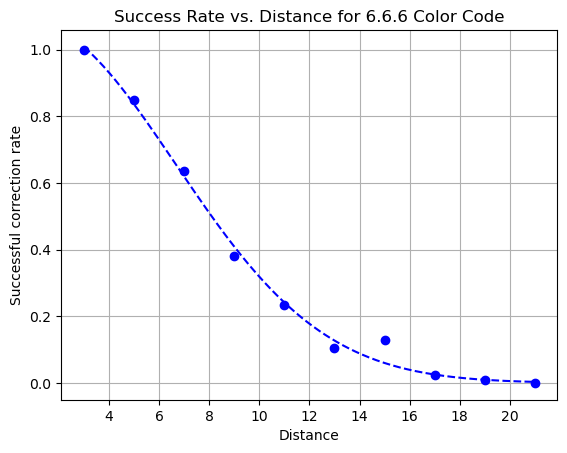

In [3]:
def gaussian(x, a, b, c):
    return np.exp(-a * (x - b)**2 + c)

with open('/home/j.march/LightsOut/outputs/results/evaluation_results.json', 'r') as file:
    data = json.load(file)
    distances = [int(key) for key in data.keys()]
    valid_rates = []
    
    for val in data.values():
  
        valid_rate = val['valid_rate']
        valid_rates.append(valid_rate)

    (a, b, c), _ = curve_fit(gaussian, distances, valid_rates, bounds=((0, np.inf)))
    
    fig, ax = plt.subplots()
    ax.plot(distances, valid_rates, 'o', c='b')
    
    fit_xs = np.linspace(3, 21, 300)
    ax.plot(fit_xs, gaussian(fit_xs, a, b, c), '--', c='b')
    
    ax.grid()
    ax.set_ylabel("Successful correction rate")
    ax.set_xlabel("Distance")
    ax.set_title("Success Rate vs. Distance for 6.6.6 Color Code")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [ ]:
def total_configurations(d_):
    return 2**(3*(d**2 - 1) / 8)

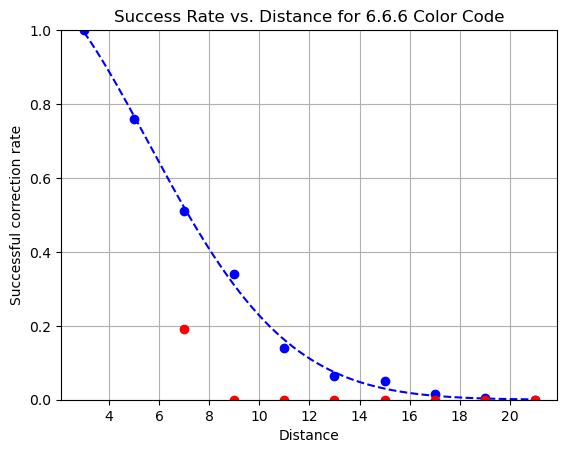

In [17]:
fig, ax = plt.subplots()
ax.plot(distances, valid_rates, 'o', c='b')

fit_xs = np.linspace(3, 21, 300)
ax.plot(fit_xs, gaussian(fit_xs, a, b, c), '--', c='b')

num_train_samples = 5000
ax.plot(distances, 5000 / (total_configurations(np.array(distances)) / 10), 'o', c='r')

ax.grid()
ax.set_ylabel("Successful correction rate")
ax.set_xlabel("Distance")
ax.set_title("Success Rate vs. Distance for 6.6.6 Color Code")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim((0, 1))

plt.show()